In [1]:
import yfinance as yf

In [2]:
from requests import get
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import urlopen as uReq
import re

In [3]:
myurl="https://in.finance.yahoo.com/most-active/?count=100&offset=000"

In [4]:
df = uReq(myurl)

In [5]:
web_html = df.read()

In [6]:
web_soup=soup(web_html,"html.parser")

In [7]:
soup.prettify(web_soup)

'<!DOCTYPE html>\n<html class="NoJs desktop" id="atomic" lang="en-IN">\n <head prefix="og: http://ogp.me/ns#">\n  <script>\n   window.performance && window.performance.mark && window.performance.mark(\'PageStart\');\n  </script>\n  <meta charset="utf-8"/>\n  <title>\n   Most Actives - India screener – Yahoo Finance\n  </title>\n  <meta content="Stock screener, industry, index membership, share data, stock price, market cap, beta, sales, profitability, valuation ratios, analyst estimates, large cap value, bargain growth, preset stock screens" name="keywords"/>\n  <meta content="on" http-equiv="x-dns-prefetch-control"/>\n  <meta content="on" property="twitter:dnt"/>\n  <meta content="131747896861126" property="fb:app_id"/>\n  <meta content="#400090" name="theme-color"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="See a list of Most Actives - India using the Yahoo Finance screener. Create your own screens with over 150 different screening cri

In [8]:
companies=[]

a=web_soup.find_all(href=re.compile("/quote/.*(NS$|BO$)"))

for i in a:
  companies+=[re.findall("=(.*)",i['href'])[0]]

companies

['IDEA.NS',
 'IDEA.BO',
 '532822.BO',
 'YESBANK.NS',
 'TRIDENT-BL.NS',
 'TATAMOTORS.NS',
 'TATAMTRDVR.NS',
 'INFRATEL.NS',
 'ASHOKLEY.NS',
 'SEQUENT-BL.NS',
 'IDFCFIRSTB.NS',
 'ZEEL.NS',
 'SBIN.NS',
 'BANKBARODA.NS',
 'FEDERALBNK.NS',
 'ITC.NS',
 'AXISBANK.NS',
 'NTPC.NS',
 'TATAPOWER.NS',
 'SAIL.NS',
 'FCONSUMER.NS',
 '532648.BO',
 'YESBANK.BO',
 'BHEL.NS',
 'ICICIBANK.NS',
 'JPPOWER.BO',
 'RBLBANK.NS',
 'VGUARD-BL.NS',
 'BHARTIARTL.NS',
 'ONGC.NS',
 'IOC.NS',
 'PNB-EQ.NS',
 'PNB.NS',
 'GRANULES.NS',
 'VEDL-EQ.NS',
 'VEDL.NS',
 'RPOWER.NS',
 'INDUSINDBK-EQ.NS',
 'INDUSINDBK.NS',
 'CGPOWER.NS',
 'GVKPIL.BO',
 '532708.BO',
 'SUZLON.NS',
 'L&TFH.NS',
 'GAIL.NS',
 'NATIONALUM.NS',
 'BANDHANBNK.NS',
 'DLF.NS',
 'ALOKINDS.NS',
 'GVKPIL.NS',
 'RECLTD.NS',
 'RCOM.NS',
 'RELIANCE.NS',
 'JPPOWER.NS',
 'M&M.NS',
 'TATASTEEL.NS',
 'EVEREADY-BL.NS',
 'JSWSTEEL.NS',
 'NMDC.NS',
 'INFRATRUST.BO',
 'GMRINFRA.NS',
 'HDFCBANK.NS',
 'JINDALSTEL-EQ.NS',
 'JINDALSTEL.NS',
 'UVSL.NS',
 'SYNDIBANK.NS',
 'CO

In [9]:
data=yf.download(companies,start="2020-04-01",end="2020-09-01")

[*********************100%***********************]  100 of 100 completed

21 Failed downloads:
- JINDALSTEL-EQ.NS: No data found for this date range, symbol may be delisted
- INDUSINDBK-EQ.NS: No data found for this date range, symbol may be delisted
- TEXRAIL-BL.NS: No data found for this date range, symbol may be delisted
- 3IINFOTECH-EQ.NS: No data found for this date range, symbol may be delisted
- INFRATRUST.BO: No data found for this date range, symbol may be delisted
- VGUARD-BL.NS: No data found for this date range, symbol may be delisted
- IBULHSGFIN-EQ.NS: No data found for this date range, symbol may be delisted
- 532822.BO: No data found for this date range, symbol may be delisted
- UPL-EQ.NS: No data found for this date range, symbol may be delisted
- 500477.BO: No data found for this date range, symbol may be delisted
- MANAPPURAM-BL.NS: No data found for this date range, symbol may be delisted
- PNB-EQ.NS: No data found for this date range, symbol may be delisted
- 53262

In [10]:
data.dropna(axis=1,inplace=True)

data.head()

Adj Close                                         \
                    3IINFOTECH.BO 3IINFOTECH.NS ABCAPITAL.NS ADANIENT.NS   
Date                                                                       
2020-04-01 00:00:00          1.26          1.25    42.900002  133.949997   
2020-04-03 00:00:00          1.29          1.30    43.450001  129.050003   
2020-04-07 00:00:00          1.36          1.35    45.099998  138.149994   
2020-04-08 00:00:00          1.26          1.25    45.599998  138.100006   
2020-04-09 00:00:00          1.29          1.25    48.000000  142.449997   

                                                                     \
                    ALOKINDS.NS ASHOKLEY.BO ASHOKLEY.NS AXISBANK.NS   
Date                                                                  
2020-04-01 00:00:00         4.1   41.099998   41.099998  358.649994   
2020-04-03 00:00:00         4.3   38.200001   38.150002  325.450012   
2020-04-07 00:00:00         4.5   39.849998   39.849998  388.850006   
2020-04-08 00:00:00         4.7   43.799999   43.849998  391.350006   
2020-04-09 00:00:00         4.9   45.650002   45.650002  420.149994   

                                                 ...       Volume           \
                    BANDHANBNK.NS BANKBARODA.NS  ... TATASTEEL.NS   UPL.NS   
Date                                             ...                         
2020-04-01 00:00:00    194.899994     51.250000  ...     11964799  2681565   
2020-04-03 00:00:00    181.550003     48.700001  ...     12526695  3265474   
2020-04-07 00:00:00    167.250000     48.150002  ...     15956659  3624533   
2020-04-08 00:00:00    193.750000     48.349998  ...     20434998  4632236   
2020-04-09 00:00:00    192.250000     50.900002  ...     13855628  4690937   

                                                                             \
                    UTTAMVALUE.BO  UVSL.NS   VEDL.NS VISESHINFO.NS WIPRO.NS   
Date                                                                          
2020-04-01 00:00:00          4089  2579387  23338180             0  4937834   
2020-04-03 00:00:00         45020  4422260  24226254             0  6573737   
2020-04-07 00:00:00        141856  4960242  45735662             0  4781431   
2020-04-08 00:00:00        209318  6002207  49394146             0  5137654   
2020-04-09 00:00:00         20574  4484792  41601771             0  3465173   

                                                     
                    YESBANK.BO YESBANK.NS   ZEEL.NS  
Date                                                 
2020-04-01 00:00:00    7028050   90370313   6571413  
2020-04-03 00:00:00    3999499   45325371   7887911  
2020-04-07 00:00:00    2884166   35065244  11487040  
2020-04-08 00:00:00    3180154   37246322  10046602  
2020-04-09 00:00:00    1641163   26334203   8715349  

[5 rows x 474 columns]

In [11]:
data.columns

MultiIndex([('Adj Close', '3IINFOTECH.BO'),
            ('Adj Close', '3IINFOTECH.NS'),
            ('Adj Close',  'ABCAPITAL.NS'),
            ('Adj Close',   'ADANIENT.NS'),
            ('Adj Close',   'ALOKINDS.NS'),
            ('Adj Close',   'ASHOKLEY.BO'),
            ('Adj Close',   'ASHOKLEY.NS'),
            ('Adj Close',   'AXISBANK.NS'),
            ('Adj Close', 'BANDHANBNK.NS'),
            ('Adj Close', 'BANKBARODA.NS'),
            ...
            (   'Volume',  'TATASTEEL.NS'),
            (   'Volume',        'UPL.NS'),
            (   'Volume', 'UTTAMVALUE.BO'),
            (   'Volume',       'UVSL.NS'),
            (   'Volume',       'VEDL.NS'),
            (   'Volume', 'VISESHINFO.NS'),
            (   'Volume',      'WIPRO.NS'),
            (   'Volume',    'YESBANK.BO'),
            (   'Volume',    'YESBANK.NS'),
            (   'Volume',       'ZEEL.NS')],
           length=474)

In [12]:
data[('Adj Close','ABCAPITAL.NS')]

Date
2020-04-01    42.900002
2020-04-03    43.450001
2020-04-07    45.099998
2020-04-08    45.599998
2020-04-09    48.000000
                ...    
2020-08-25    62.000000
2020-08-26    65.349998
2020-08-27    64.349998
2020-08-28    64.800003
2020-08-31    61.250000
Name: (Adj Close, ABCAPITAL.NS), Length: 103, dtype: float64

In [13]:
df=data[[i for i in data.columns if i[0]=='Adj Close']]

In [14]:
df=df.T

df.head()

Date                     2020-04-01  2020-04-03  2020-04-07  2020-04-08  \
Adj Close 3IINFOTECH.BO    1.260000    1.290000    1.360000    1.260000   
          3IINFOTECH.NS    1.250000    1.300000    1.350000    1.250000   
          ABCAPITAL.NS    42.900002   43.450001   45.099998   45.599998   
          ADANIENT.NS    133.949997  129.050003  138.149994  138.100006   
          ALOKINDS.NS      4.100000    4.300000    4.500000    4.700000   

Date                     2020-04-09  2020-04-13  2020-04-15  2020-04-16  \
Adj Close 3IINFOTECH.BO    1.290000        1.26    1.220000    1.450000   
          3IINFOTECH.NS    1.250000        1.25    1.200000    1.400000   
          ABCAPITAL.NS    48.000000       46.25   48.049999   52.349998   
          ADANIENT.NS    142.449997      146.00  145.250000  143.300003   
          ALOKINDS.NS      4.900000        5.10    5.350000    5.600000   

Date                     2020-04-17  2020-04-20  ...  2020-08-18  2020-08-19  \
Adj Close 3IINFOTECH.BO    1.680000    2.000000  ...    3.250000    3.410000   
          3IINFOTECH.NS    1.650000    1.950000  ...    3.050000    3.200000   
          ABCAPITAL.NS    55.099998   53.549999  ...   59.900002   61.549999   
          ADANIENT.NS    143.899994  146.699997  ...  213.699997  239.550003   
          ALOKINDS.NS      5.850000    6.100000  ...   36.000000   35.299999   

Date                     2020-08-20  2020-08-21  2020-08-24  2020-08-25  \
Adj Close 3IINFOTECH.BO    3.580000    3.750000    3.930000    4.120000   
          3IINFOTECH.NS    3.350000    3.500000    3.650000    3.800000   
          ABCAPITAL.NS    62.950001   62.799999   62.150002   62.000000   
          ADANIENT.NS    234.000000  233.350006  248.699997  307.549988   
          ALOKINDS.NS     34.150002   32.500000   34.099998   35.400002   

Date                     2020-08-26  2020-08-27  2020-08-28  2020-08-31  
Adj Close 3IINFOTECH.BO    4.320000    4.170000    3.970000    3.780000  
          3IINFOTECH.NS    3.950000    4.050000    3.850000    3.700000  
          ABCAPITAL.NS    65.349998   64.349998   64.800003   61.250000  
          ADANIENT.NS    285.549988  286.700012  288.250000  279.549988  
          ALOKINDS.NS     34.450001   33.700001   33.349998   31.700001  

[5 rows x 103 columns]

In [15]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt  
import numpy as np   
from scipy.spatial.distance import cdist

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

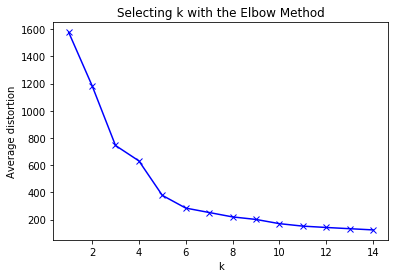

In [16]:
clusters=range(1,15)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df)
    prediction=model.predict(df)
    meanDistortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [17]:
meanDistortions       #5 appears best (futher clustering doesnt drop the meanDistortions by much ,hence are overfitting)

[1577.2735963604573,
 1184.6943214727403,
 744.9911043440028,
 631.5519837636701,
 378.2332862376715,
 284.7766687568626,
 252.30398694591966,
 219.88277685398018,
 201.3423127266801,
 170.37094729464505,
 152.17007251275626,
 142.24595412840958,
 133.32447591267803,
 124.30586590854884]

In [18]:
model=KMeans(n_clusters=5)
model.fit(df)
prediction=model.predict(df)
meanDistortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df
                           .shape[0])

In [19]:
pd.DataFrame(model.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,26.892102,26.672443,27.635862,28.017432,29.157567,29.122815,29.263199,30.050710,30.828858,30.870558,...,37.988200,38.618600,39.179800,39.250000,39.194400,39.340400,39.949200,39.935600,40.451200,38.878200
1,323.458493,317.942462,360.399119,361.865648,379.587175,382.189053,383.950124,390.271986,405.812436,398.598212,...,482.427772,484.527788,479.216668,479.988885,483.805562,485.194441,489.111115,498.644443,517.072232,498.727780
2,1076.408203,1073.419434,1201.588257,1187.690430,1215.386353,1184.701660,1145.548584,1163.680664,1219.421265,1239.147217,...,2118.550049,2131.550049,2097.050049,2081.850098,2095.750000,2082.100098,2137.300049,2110.600098,2116.149902,2080.699951
3,136.684270,133.105980,141.061274,143.860555,148.540055,146.633208,145.738454,147.866976,152.247914,149.149875,...,209.977668,213.142662,214.010461,213.712642,215.515658,218.419855,220.115464,221.968185,223.328216,214.976368
4,712.177368,695.842163,763.259277,756.008972,776.377747,762.095032,746.883942,747.610992,765.303101,794.688263,...,1012.024994,1012.949982,1007.075012,1017.225006,1032.225037,1028.899963,1034.624969,1029.574982,1024.875000,1022.224976


In [20]:
df['labels']=model.labels_

tocols=["labels"]+df.columns.to_list()

tocols=tocols[:-1]

df=df[tocols]

df.head()

Date                     labels  2020-04-01 00:00:00  2020-04-03 00:00:00  \
Adj Close 3IINFOTECH.BO       0             1.260000             1.290000   
          3IINFOTECH.NS       0             1.250000             1.300000   
          ABCAPITAL.NS        0            42.900002            43.450001   
          ADANIENT.NS         3           133.949997           129.050003   
          ALOKINDS.NS         0             4.100000             4.300000   

Date                     2020-04-07 00:00:00  2020-04-08 00:00:00  \
Adj Close 3IINFOTECH.BO             1.360000             1.260000   
          3IINFOTECH.NS             1.350000             1.250000   
          ABCAPITAL.NS             45.099998            45.599998   
          ADANIENT.NS             138.149994           138.100006   
          ALOKINDS.NS               4.500000             4.700000   

Date                     2020-04-09 00:00:00  2020-04-13 00:00:00  \
Adj Close 3IINFOTECH.BO             1.290000                 1.26   
          3IINFOTECH.NS             1.250000                 1.25   
          ABCAPITAL.NS             48.000000                46.25   
          ADANIENT.NS             142.449997               146.00   
          ALOKINDS.NS               4.900000                 5.10   

Date                     2020-04-15 00:00:00  2020-04-16 00:00:00  \
Adj Close 3IINFOTECH.BO             1.220000             1.450000   
          3IINFOTECH.NS             1.200000             1.400000   
          ABCAPITAL.NS             48.049999            52.349998   
          ADANIENT.NS             145.250000           143.300003   
          ALOKINDS.NS               5.350000             5.600000   

Date                     2020-04-17 00:00:00  ...  2020-08-18 00:00:00  \
Adj Close 3IINFOTECH.BO             1.680000  ...             3.250000   
          3IINFOTECH.NS             1.650000  ...             3.050000   
          ABCAPITAL.NS             55.099998  ...            59.900002   
          ADANIENT.NS             143.899994  ...           213.699997   
          ALOKINDS.NS               5.850000  ...            36.000000   

Date                     2020-08-19 00:00:00  2020-08-20 00:00:00  \
Adj Close 3IINFOTECH.BO             3.410000             3.580000   
          3IINFOTECH.NS             3.200000             3.350000   
          ABCAPITAL.NS             61.549999            62.950001   
          ADANIENT.NS             239.550003           234.000000   
          ALOKINDS.NS              35.299999            34.150002   

Date                     2020-08-21 00:00:00  2020-08-24 00:00:00  \
Adj Close 3IINFOTECH.BO             3.750000             3.930000   
          3IINFOTECH.NS             3.500000             3.650000   
          ABCAPITAL.NS             62.799999            62.150002   
          ADANIENT.NS             233.350006           248.699997   
          ALOKINDS.NS              32.500000            34.099998   

Date                     2020-08-25 00:00:00  2020-08-26 00:00:00  \
Adj Close 3IINFOTECH.BO             4.120000             4.320000   
          3IINFOTECH.NS             3.800000             3.950000   
          ABCAPITAL.NS             62.000000            65.349998   
          ADANIENT.NS             307.549988           285.549988   
          ALOKINDS.NS              35.400002            34.450001   

Date                     2020-08-27 00:00:00  2020-08-28 00:00:00  \
Adj Close 3IINFOTECH.BO             4.170000             3.970000   
          3IINFOTECH.NS             4.050000             3.850000   
          ABCAPITAL.NS             64.349998            64.800003   
          ADANIENT.NS             286.700012           288.250000   
          ALOKINDS.NS              33.700001            33.349998   

Date                     2020-08-31 00:00:00  
Adj Close 3IINFOTECH.BO             3.780000  
          3IINFOTECH.NS             3.700000  
          ABCAPITAL.NS             61.250000  

In [21]:
len(df)

79

In [22]:
df2=data[[i for i in data.columns if i[0]=='Adj Close']]


df2=df2.T

df2.head()

Date                     2020-04-01  2020-04-03  2020-04-07  2020-04-08  \
Adj Close 3IINFOTECH.BO    1.260000    1.290000    1.360000    1.260000   
          3IINFOTECH.NS    1.250000    1.300000    1.350000    1.250000   
          ABCAPITAL.NS    42.900002   43.450001   45.099998   45.599998   
          ADANIENT.NS    133.949997  129.050003  138.149994  138.100006   
          ALOKINDS.NS      4.100000    4.300000    4.500000    4.700000   

Date                     2020-04-09  2020-04-13  2020-04-15  2020-04-16  \
Adj Close 3IINFOTECH.BO    1.290000        1.26    1.220000    1.450000   
          3IINFOTECH.NS    1.250000        1.25    1.200000    1.400000   
          ABCAPITAL.NS    48.000000       46.25   48.049999   52.349998   
          ADANIENT.NS    142.449997      146.00  145.250000  143.300003   
          ALOKINDS.NS      4.900000        5.10    5.350000    5.600000   

Date                     2020-04-17  2020-04-20  ...  2020-08-18  2020-08-19  \
Adj Close 3IINFOTECH.BO    1.680000    2.000000  ...    3.250000    3.410000   
          3IINFOTECH.NS    1.650000    1.950000  ...    3.050000    3.200000   
          ABCAPITAL.NS    55.099998   53.549999  ...   59.900002   61.549999   
          ADANIENT.NS    143.899994  146.699997  ...  213.699997  239.550003   
          ALOKINDS.NS      5.850000    6.100000  ...   36.000000   35.299999   

Date                     2020-08-20  2020-08-21  2020-08-24  2020-08-25  \
Adj Close 3IINFOTECH.BO    3.580000    3.750000    3.930000    4.120000   
          3IINFOTECH.NS    3.350000    3.500000    3.650000    3.800000   
          ABCAPITAL.NS    62.950001   62.799999   62.150002   62.000000   
          ADANIENT.NS    234.000000  233.350006  248.699997  307.549988   
          ALOKINDS.NS     34.150002   32.500000   34.099998   35.400002   

Date                     2020-08-26  2020-08-27  2020-08-28  2020-08-31  
Adj Close 3IINFOTECH.BO    4.320000    4.170000    3.970000    3.780000  
          3IINFOTECH.NS    3.950000    4.050000    3.850000    3.700000  
          ABCAPITAL.NS    65.349998   64.349998   64.800003   61.250000  
          ADANIENT.NS    285.549988  286.700012  288.250000  279.549988  
          ALOKINDS.NS     34.450001   33.700001   33.349998   31.700001  

[5 rows x 103 columns]

In [24]:
ml=[]
 #function to get gain ratio
def gain_perc(d):
  global ml
  rp=[(d[i+1]-d[i])/d[i] for i in range(d.shape[0]-1) ]
  rp=[d.name[1]]+rp 
  ml+=[rp]



df2.apply(gain_perc,axis=1)

len(ml)

79

In [25]:
#dataframe containing ration of daily gains
df3=pd.DataFrame(columns=['stock']+df2.columns.to_list()[:-1],data=ml)

df3.set_index("stock",inplace=True)

df3.head()  

,2020-04-01,2020-04-03,2020-04-07,2020-04-08,2020-04-09,2020-04-13,2020-04-15,2020-04-16,2020-04-17,2020-04-20,...,2020-08-17,2020-08-18,2020-08-19,2020-08-20,2020-08-21,2020-08-24,2020-08-25,2020-08-26,2020-08-27,2020-08-28
stock,,,,,,,,,,,,,,,,,,,,,
3IINFOTECH.BO,0.023810,0.054264,-0.073529,0.023810,-0.023256,-0.031746,0.188525,0.158621,0.190476,-0.100000,...,0.048387,0.049231,0.049853,0.047486,0.048000,0.048346,0.048544,-0.034722,-0.047962,-0.047859
3IINFOTECH.NS,0.040000,0.038462,-0.074074,0.000000,0.000000,-0.040000,0.166667,0.178571,0.181818,-0.076923,...,0.033898,0.049180,0.046875,0.044776,0.042857,0.041096,0.039474,0.025316,-0.049383,-0.038961
ABCAPITAL.NS,0.012820,0.037975,0.011086,0.052632,-0.036458,0.038919,0.089490,0.052531,-0.028131,-0.062558,...,0.010118,0.027546,0.022746,-0.002383,-0.010350,-0.002414,0.054032,-0.015302,0.006993,-0.054784
ADANIENT.NS,-0.036581,0.070515,-0.000362,0.031499,0.024921,-0.005137,-0.013425,0.004187,0.019458,-0.073279,...,0.080384,0.120964,-0.023168,-0.002778,0.065781,0.236630,-0.071533,0.004027,0.005406,-0.030182
ALOKINDS.NS,0.048781,0.046512,0.044444,0.042553,0.040816,0.049020,0.046729,0.044643,0.042735,0.049180,...,0.009818,-0.019444,-0.032578,-0.048316,0.049231,0.038123,-0.026836,-0.021771,-0.010386,-0.049475


In [26]:
from sklearn import metrics
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import silhouette_samples

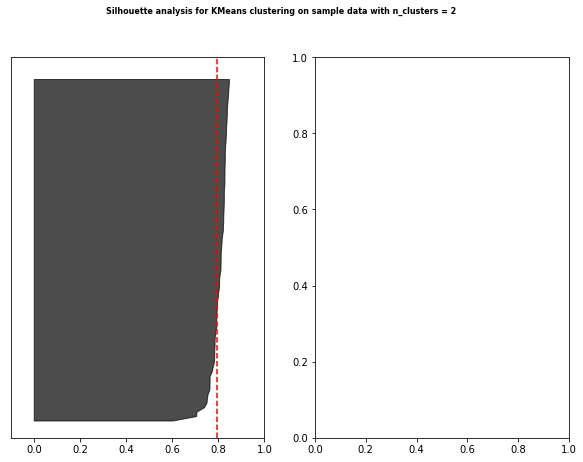

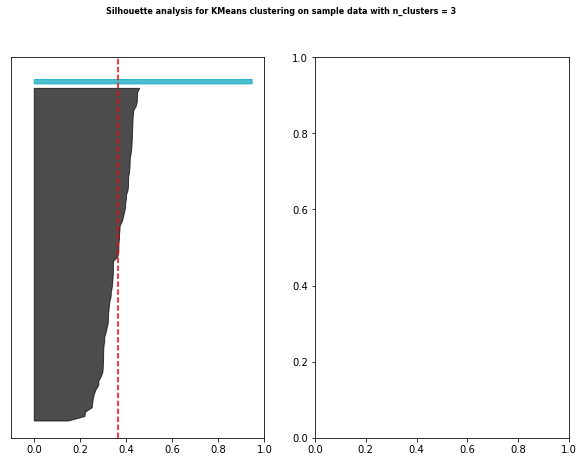

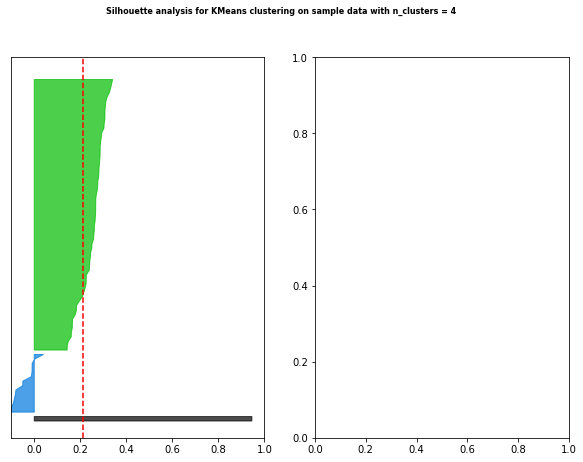

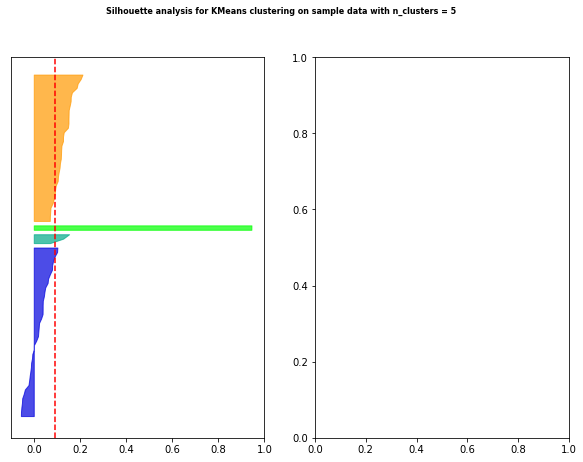

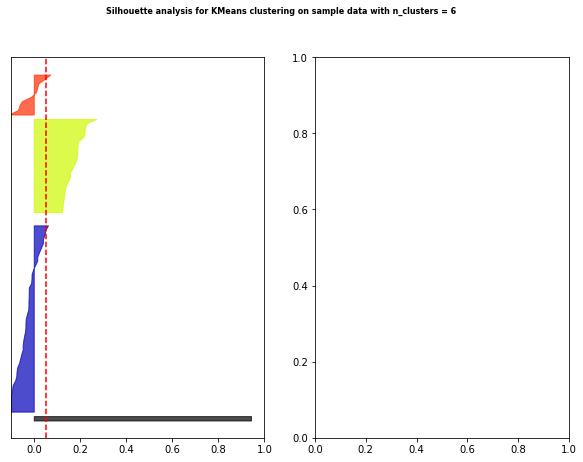

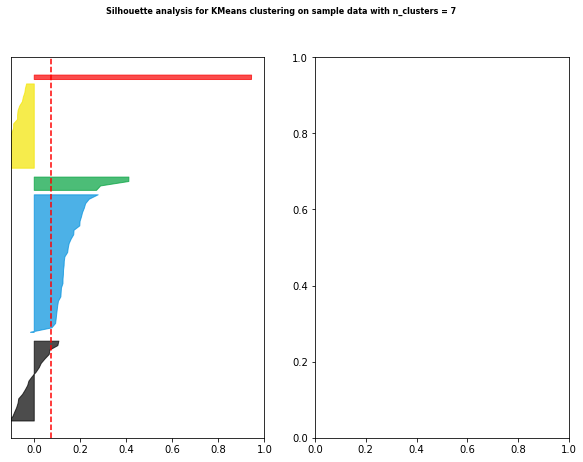

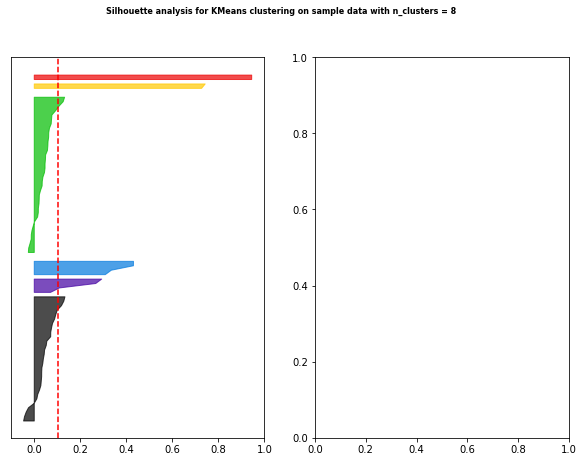

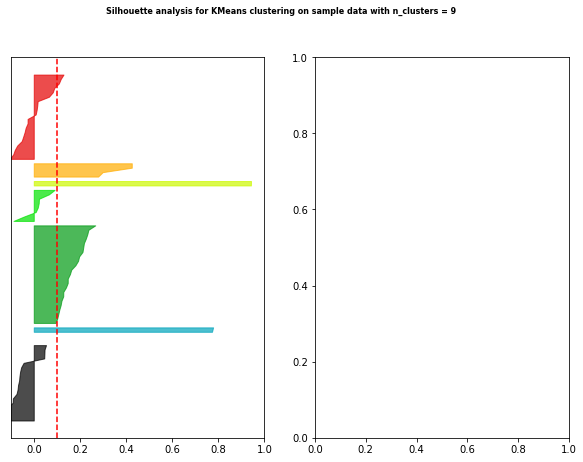

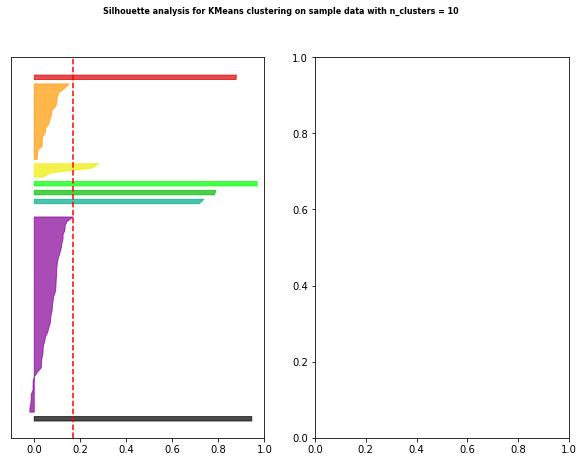

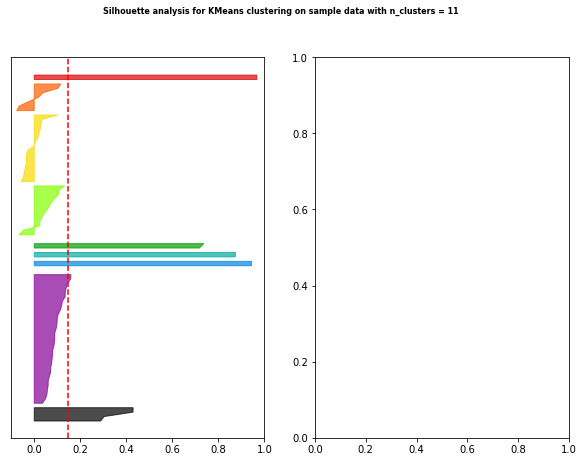

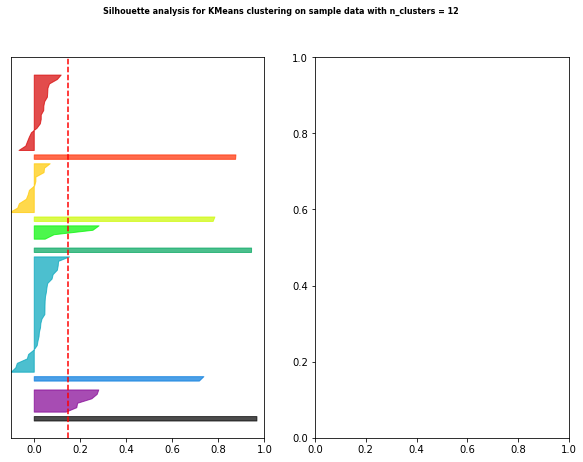

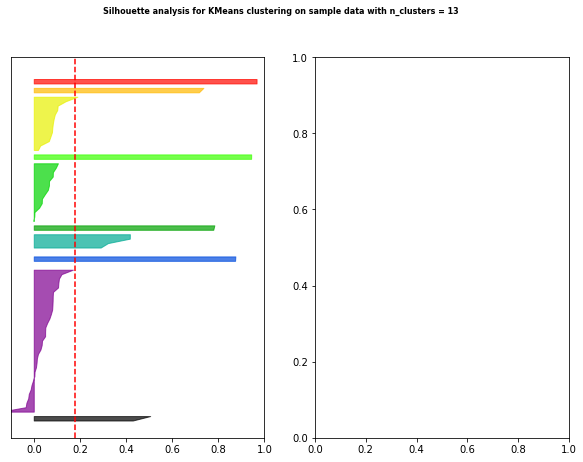

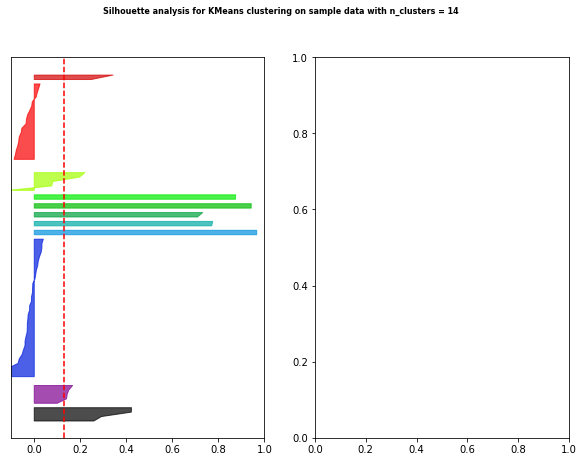

In [27]:
clusters=range(2,15)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df3)
    prediction=model.predict(df3)
    labels=model.labels_

    silhouette_avg=metrics.silhouette_score(df3, labels, metric='euclidean')
    meanDistortions.append(sum(np.min(cdist(df3, model.cluster_centers_, 'euclidean'), axis=1)) / df3
                           .shape[0])
    
    sample_silhouette_values = silhouette_samples(df3, prediction)
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 7)
    ax1.set_xlim([-0.1, 1])
    y_lower=10
    for i in range(k):
      ith_cluster_silhouette_values =sample_silhouette_values[prediction == i]

      ith_cluster_silhouette_values.sort()
      
      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i
      # print(size_cluster_i,k,y_lower,y_upper)
      color = cm.nipy_spectral(float(i) / k)

      ax1.fill_betweenx(np.arange(y_lower, y_upper),
                        0, ith_cluster_silhouette_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
      y_lower = y_upper 
      
    ax1.set_yticks([])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % k),
                 fontsize=8, fontweight='bold')
plt.show()




Text(0.5, 1.0, 'Selecting k with the Elbow Method')

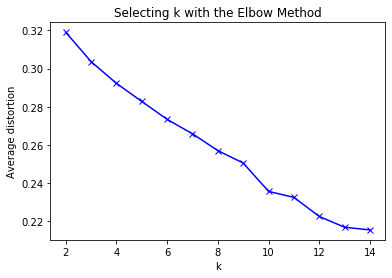

In [28]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [29]:
model=KMeans(n_clusters=10)      #10
model.fit(df3)
prediction=model.predict(df3)
labels=model.labels_


In [30]:
df3['labels']=model.labels_

tocols=['labels']+df3.columns.to_list()
tocols=tocols[:-1]

df3=df3[tocols]

df3.head()

,labels,2020-04-01 00:00:00,2020-04-03 00:00:00,2020-04-07 00:00:00,2020-04-08 00:00:00,2020-04-09 00:00:00,2020-04-13 00:00:00,2020-04-15 00:00:00,2020-04-16 00:00:00,2020-04-17 00:00:00,...,2020-08-17 00:00:00,2020-08-18 00:00:00,2020-08-19 00:00:00,2020-08-20 00:00:00,2020-08-21 00:00:00,2020-08-24 00:00:00,2020-08-25 00:00:00,2020-08-26 00:00:00,2020-08-27 00:00:00,2020-08-28 00:00:00
stock,,,,,,,,,,,,,,,,,,,,,
3IINFOTECH.BO,4,0.023810,0.054264,-0.073529,0.023810,-0.023256,-0.031746,0.188525,0.158621,0.190476,...,0.048387,0.049231,0.049853,0.047486,0.048000,0.048346,0.048544,-0.034722,-0.047962,-0.047859
3IINFOTECH.NS,4,0.040000,0.038462,-0.074074,0.000000,0.000000,-0.040000,0.166667,0.178571,0.181818,...,0.033898,0.049180,0.046875,0.044776,0.042857,0.041096,0.039474,0.025316,-0.049383,-0.038961
ABCAPITAL.NS,0,0.012820,0.037975,0.011086,0.052632,-0.036458,0.038919,0.089490,0.052531,-0.028131,...,0.010118,0.027546,0.022746,-0.002383,-0.010350,-0.002414,0.054032,-0.015302,0.006993,-0.054784
ADANIENT.NS,8,-0.036581,0.070515,-0.000362,0.031499,0.024921,-0.005137,-0.013425,0.004187,0.019458,...,0.080384,0.120964,-0.023168,-0.002778,0.065781,0.236630,-0.071533,0.004027,0.005406,-0.030182
ALOKINDS.NS,7,0.048781,0.046512,0.044444,0.042553,0.040816,0.049020,0.046729,0.044643,0.042735,...,0.009818,-0.019444,-0.032578,-0.048316,0.049231,0.038123,-0.026836,-0.021771,-0.010386,-0.049475


In [31]:
#quaterly gain for each stock
def q_gain(x):
  i=1
  for j in x[1:]:
    i*=(1+j)
  return i

In [32]:
df3['quaterly_gain']=df3.apply(q_gain,axis=1)

df3['quaterly_gain'].head()

tocols=['quaterly_gain']+df3.columns.to_list()[:-1]
df3=df3[tocols]
df3.head()

,quaterly_gain,labels,2020-04-01 00:00:00,2020-04-03 00:00:00,2020-04-07 00:00:00,2020-04-08 00:00:00,2020-04-09 00:00:00,2020-04-13 00:00:00,2020-04-15 00:00:00,2020-04-16 00:00:00,...,2020-08-17 00:00:00,2020-08-18 00:00:00,2020-08-19 00:00:00,2020-08-20 00:00:00,2020-08-21 00:00:00,2020-08-24 00:00:00,2020-08-25 00:00:00,2020-08-26 00:00:00,2020-08-27 00:00:00,2020-08-28 00:00:00
stock,,,,,,,,,,,,,,,,,,,,,
3IINFOTECH.BO,3.000000,4,0.023810,0.054264,-0.073529,0.023810,-0.023256,-0.031746,0.188525,0.158621,...,0.048387,0.049231,0.049853,0.047486,0.048000,0.048346,0.048544,-0.034722,-0.047962,-0.047859
3IINFOTECH.NS,2.960000,4,0.040000,0.038462,-0.074074,0.000000,0.000000,-0.040000,0.166667,0.178571,...,0.033898,0.049180,0.046875,0.044776,0.042857,0.041096,0.039474,0.025316,-0.049383,-0.038961
ABCAPITAL.NS,1.427739,0,0.012820,0.037975,0.011086,0.052632,-0.036458,0.038919,0.089490,0.052531,...,0.010118,0.027546,0.022746,-0.002383,-0.010350,-0.002414,0.054032,-0.015302,0.006993,-0.054784
ADANIENT.NS,2.086973,8,-0.036581,0.070515,-0.000362,0.031499,0.024921,-0.005137,-0.013425,0.004187,...,0.080384,0.120964,-0.023168,-0.002778,0.065781,0.236630,-0.071533,0.004027,0.005406,-0.030182
ALOKINDS.NS,7.731708,7,0.048781,0.046512,0.044444,0.042553,0.040816,0.049020,0.046729,0.044643,...,0.009818,-0.019444,-0.032578,-0.048316,0.049231,0.038123,-0.026836,-0.021771,-0.010386,-0.049475


In [33]:
df4=data[[i for i in data.columns if i[0]=='Adj Close']]

In [34]:
df4.describe().iloc[2,:]["Adj Close"]

3IINFOTECH.BO     0.716092
3IINFOTECH.NS     0.669958
ABCAPITAL.NS      7.465792
ADANIENT.NS      37.220154
ALOKINDS.NS      14.479083
                   ...    
VISESHINFO.NS     0.000000
WIPRO.NS         37.069378
YESBANK.BO        6.023682
YESBANK.NS        6.020498
ZEEL.NS          20.621067
Name: std, Length: 79, dtype: float64

In [35]:
bb=df4.describe().iloc[2,:]["Adj Close"]
# cc=df4.describe().iloc[5,:]["Adj Close"]

df3["Risk"]=df3.apply(lambda x: bb[x.name] ,axis=1)

tocols=['Risk']+df3.columns.to_list()[:-1]
df3=df3[tocols]
df3.head()

# df3["Risk"].describe()

In [38]:
df3.index

Index(['3IINFOTECH.BO', '3IINFOTECH.NS', 'ABCAPITAL.NS', 'ADANIENT.NS',
       'ALOKINDS.NS', 'ASHOKLEY.BO', 'ASHOKLEY.NS', 'AXISBANK.NS',
       'BANDHANBNK.NS', 'BANKBARODA.NS', 'BEL.NS', 'BHARTIARTL.NS', 'BHEL.NS',
       'BPCL.NS', 'CGPOWER.BO', 'CGPOWER.NS', 'COALINDIA.NS', 'DLF.NS',
       'FCONSUMER.NS', 'FEDERALBNK.NS', 'GAIL.NS', 'GMRINFRA.NS',
       'GRANULES.NS', 'GTLINFRA.NS', 'GVKPIL.BO', 'GVKPIL.NS', 'HCC.NS',
       'HDFCBANK.NS', 'HFCL.NS', 'HINDALCO.NS', 'IBULHSGFIN.NS',
       'ICICIBANK.NS', 'IDEA.BO', 'IDEA.NS', 'IDFCFIRSTB.NS', 'INDUSINDBK.NS',
       'INFRATEL.NS', 'INFY.NS', 'IOC.NS', 'ITC.NS', 'JINDALSTEL.NS',
       'JPASSOCIAT.NS', 'JPPOWER.BO', 'JPPOWER.NS', 'JSWSTEEL.NS', 'L&TFH.NS',
       'M&M.NS', 'MANAPPURAM.NS', 'NATIONALUM.NS', 'NBCC.NS', 'NMDC.NS',
       'NTPC.NS', 'ONGC.NS', 'PFC.NS', 'PNB.NS', 'POWERGRID.NS', 'RBLBANK.NS',
       'RCOM.NS', 'RECLTD.NS', 'RELIANCE.NS', 'RPOWER.NS', 'SAIL.NS',
       'SBIN.NS', 'SOUTHBANK.NS', 'SUNPHARMA.NS', 'SUZLO

In [39]:
#Obtaining Nifty data

url="https://in.finance.yahoo.com/quote/%5ENSEI/history?period1=1585699200&period2=1599004800&interval=1d&filter=history&frequency=1d"
data2=uReq(url)
web_data=data2.read()
nifty_soup=soup(web_data,"html.parser")

In [40]:
import re

In [41]:
date=[]
adjclose=[]
prev_c=50
for c,k in enumerate(nifty_soup.find_all("span")):
  if c>=57 and int(k["data-reactid"])>=68:
    if c==prev_c+7:
      date+=[k.string]
      prev_c=c
    if c==prev_c+5:
      adjclose+=[float(re.sub(",","",k.string))]



In [44]:
date=date[:-1]
len(date)

len(adjclose)

99

In [45]:
adjclose[-1]

9111.9

In [46]:
adjclose+=[8748.75,8792.20,8083.80,8252.80]

In [47]:
np.std(adjclose)    #in INR

916.8808544188959

In [48]:
nifty_gain=(adjclose[0]/adjclose[-1])
nifty_gain-1

0.37983472276076014

Text(-10, 0.0233, 'risk free rate')

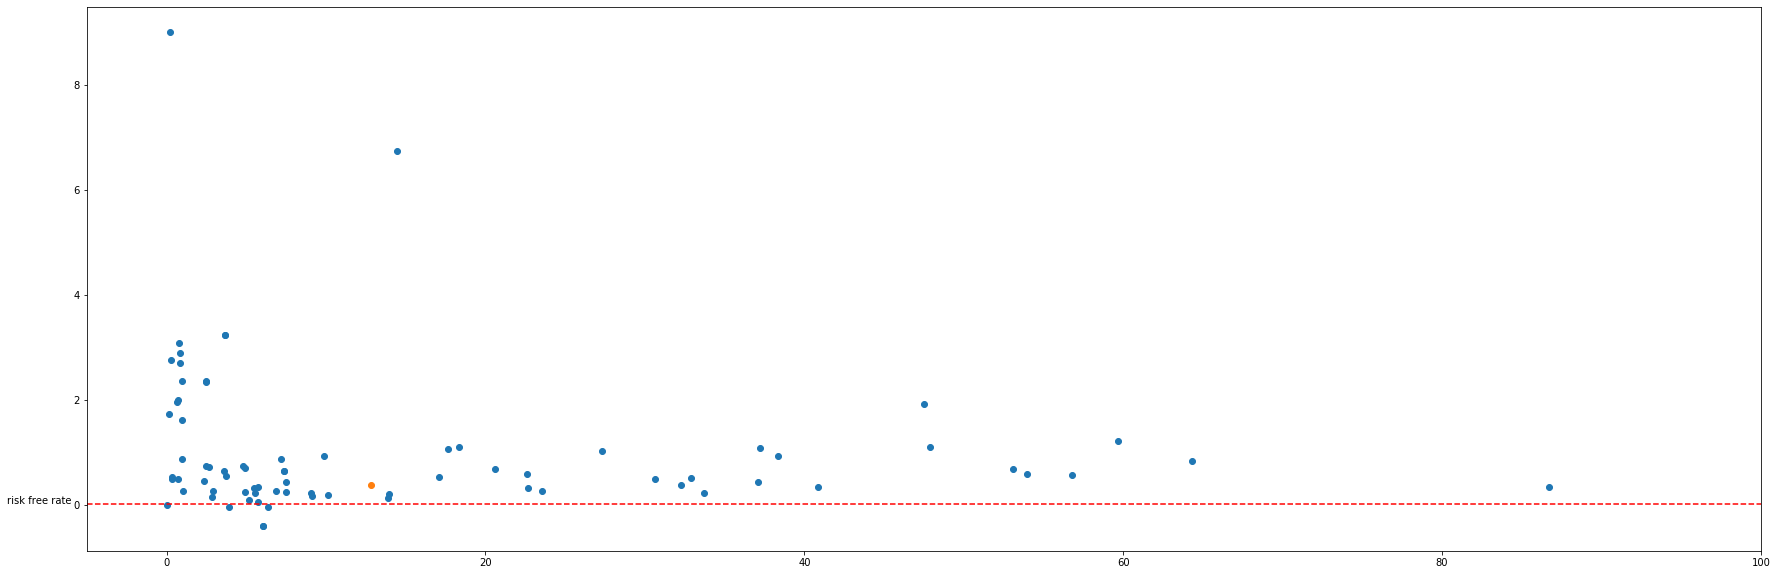

In [49]:
#quaterly gain is actually gain_ratio
fig,ax=plt.subplots()
fig.set_size_inches(30, 10)
ax.set_xlim(-5,100)
ax.scatter(df3["Risk"],df3["quaterly_gain"]-1)
ax.scatter(916.88*0.014,0.3798)
ax.axhline(y=0.0233, color='r', linestyle='--')
ax.text(-10,0.0233,"risk free rate")

In [50]:
df3.describe()

,Risk,quaterly_gain,labels,2020-04-01 00:00:00,2020-04-03 00:00:00,2020-04-07 00:00:00,2020-04-08 00:00:00,2020-04-09 00:00:00,2020-04-13 00:00:00,2020-04-15 00:00:00,...,2020-08-17 00:00:00,2020-08-18 00:00:00,2020-08-19 00:00:00,2020-08-20 00:00:00,2020-08-21 00:00:00,2020-08-24 00:00:00,2020-08-25 00:00:00,2020-08-26 00:00:00,2020-08-27 00:00:00,2020-08-28 00:00:00
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,...,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,21.579585,2.023932,4.329114,0.011315,0.052164,0.029952,0.037676,0.008026,-0.005944,0.039906,...,0.012604,0.019670,0.007671,0.002556,0.007125,0.006595,0.009204,0.008096,0.009041,-0.033450
std,41.816043,1.405440,2.955749,0.124944,0.084901,0.120516,0.035398,0.052847,0.068696,0.120104,...,0.030763,0.029108,0.029184,0.028096,0.026797,0.034718,0.030823,0.029433,0.041915,0.032270
min,0.000000,0.599165,0.000000,-0.154989,-0.500000,-0.074074,-0.066667,-0.085085,-0.500000,-0.062500,...,-0.049383,-0.019444,-0.083333,-0.062500,-0.049454,-0.037736,-0.090909,-0.050000,-0.090909,-0.096279
25%,2.555643,1.266374,2.000000,-0.030453,0.022575,-0.009807,0.015477,-0.022946,-0.021611,0.002884,...,-0.004743,-0.000995,-0.013087,-0.010955,-0.009508,-0.012152,-0.006097,-0.010222,-0.012640,-0.053099
50%,6.880293,1.584582,5.000000,-0.003395,0.044561,0.006897,0.038113,0.000000,0.000000,0.017241,...,0.010118,0.011116,0.000000,0.000000,0.001629,-0.002833,0.004563,0.000000,0.005085,-0.040426
75%,25.419510,2.091297,7.000000,0.034486,0.087091,0.041918,0.054608,0.022811,0.017978,0.042183,...,0.022815,0.039088,0.029242,0.014561,0.023545,0.015082,0.017728,0.020408,0.022569,-0.018622
max,319.142690,10.000000,9.000000,1.000000,0.288994,1.000000,0.168505,0.250000,0.098931,1.000000,...,0.100000,0.131360,0.082892,0.094595,0.070588,0.236630,0.112617,0.100000,0.141243,0.050000


In [51]:
df3=df3[df3["quaterly_gain"]!=1]

In [52]:
len(df3)

78

In [53]:
from random import randrange
import random

In [54]:
def generate_randomP(num_stocks,df3,df2,P_return,P_risk,P_sharpie):
    ind=random.sample(range(0, 77), num_stocks)
    weights = np.random.random(num_stocks)
    weights /=np.sum(weights)
  #  

    rv=df3.iloc[ind,0].to_numpy()
    qgv=df3.iloc[ind,1].to_numpy()
  #  print(weights.shape,qgv.shape)
    P_return+=[np.dot(weights,qgv)]
    cov_M=np.cov(df2.iloc[ind,:].to_numpy())
  #  print(P_return)
    P_risk+=[np.sqrt(np.dot(weights.T, np.dot(cov_M, weights)))]
  #  print(max(qgv))
    P_sharpie+=[(P_return[-1]-1.0233)/P_risk[-1]]


In [55]:
P_return=[]
P_risk=[]
P_sharpie=[]
for i in range(300000):
    num_stocks=randrange(1,78)
    generate_randomP(num_stocks,df3,df2,P_return,P_risk,P_sharpie)
  # print(P_risk[-1],i)
  # print(i)

D:\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


In [57]:
Pf=pd.DataFrame(zip(P_return,P_risk,P_sharpie),columns=["return","risk","sharpie"])
# Pf.sort_values(by=["sharpie","return"],axis=0)

Text(-10, 0.0233, 'risk free rate')

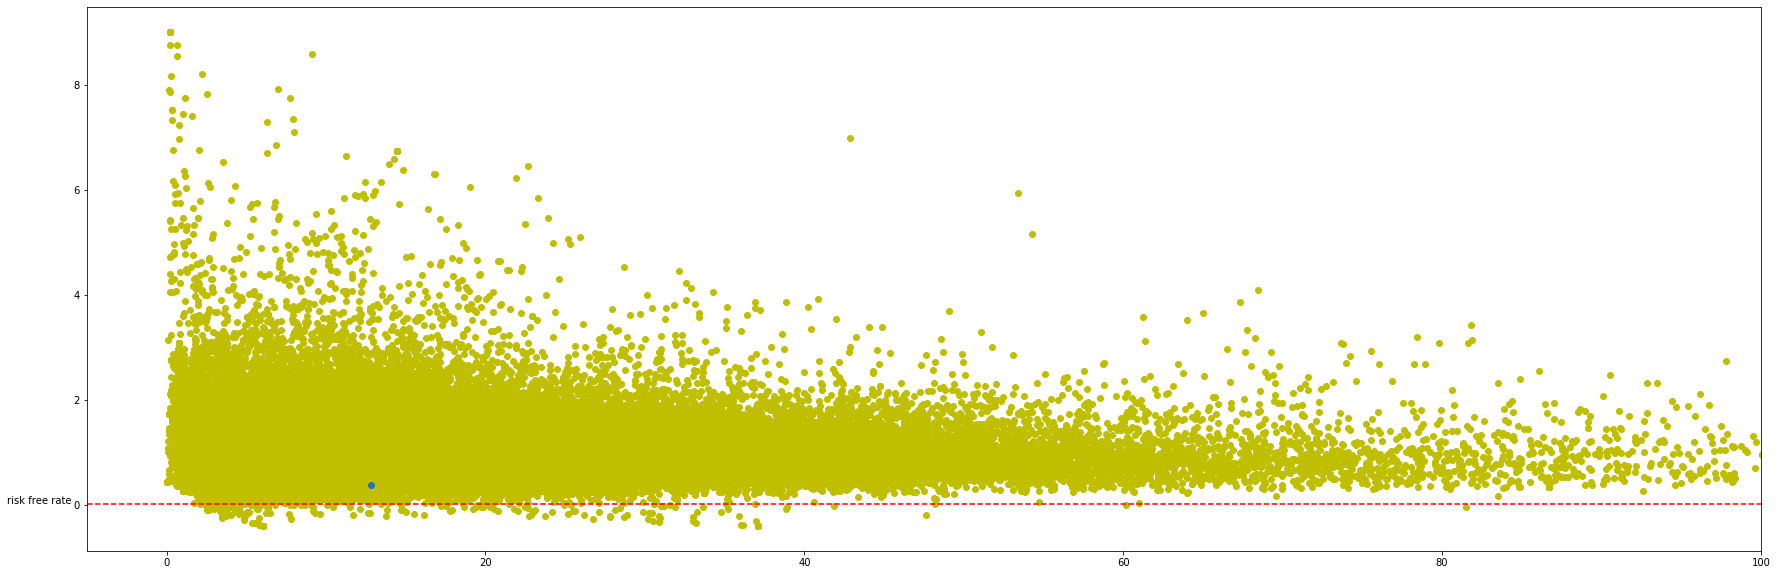

In [58]:
fig,ax=plt.subplots()
fig.set_size_inches(30, 10)
ax.set_xlim(-5,100)
# ax.scatter(df3["Risk"],df3["quaterly_gain"]-1)
ax.scatter(Pf["risk"],Pf["return"]-1,color='y')
ax.scatter(916.88*0.014,0.3798)
ax.axhline(y=0.0233, color='r', linestyle='--')
ax.text(-10,0.0233,"risk free rate")

1320


Text(-10, 0.0233, 'risk free rate')

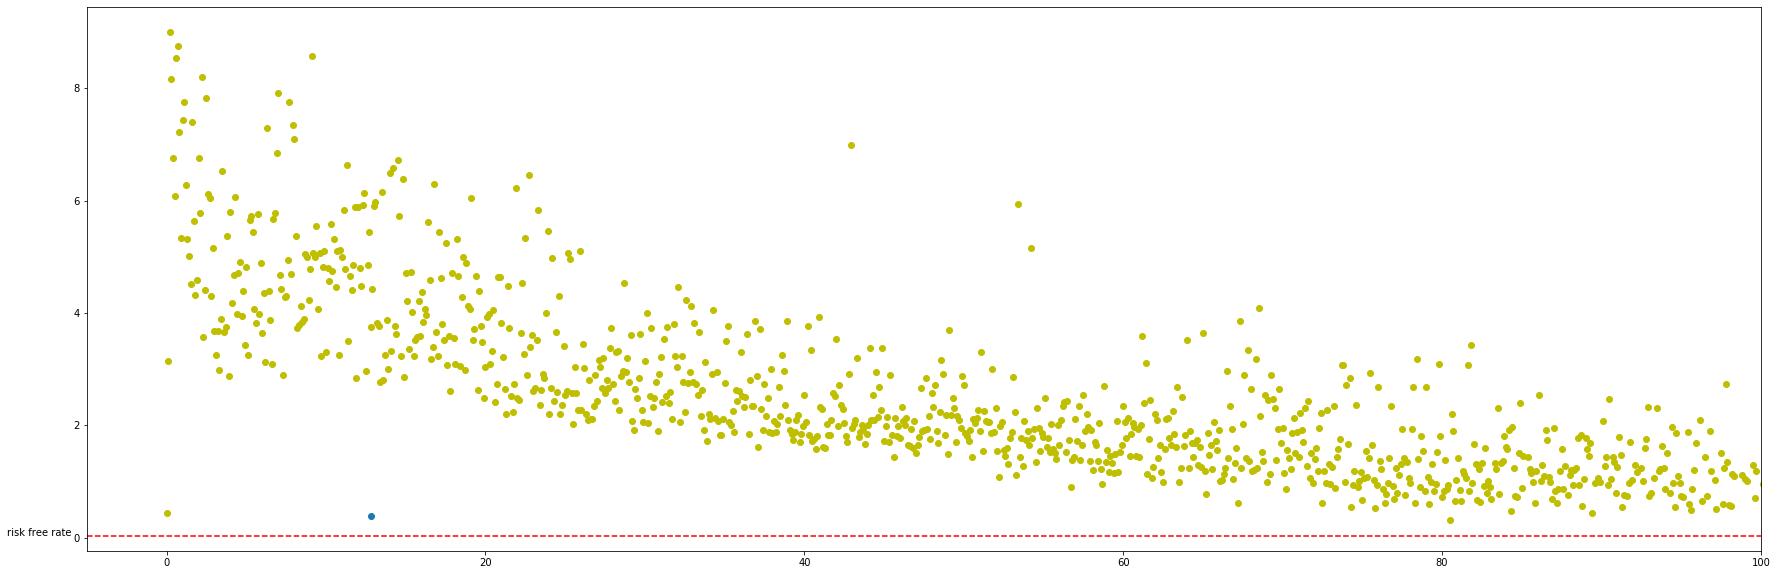

In [88]:
#Efficient Frontier
Pf["risk"]=Pf["risk"].apply(lambda x: round(x,1)) #discretizing a bit more

lr=[]
lg=[]
for i in Pf["risk"].value_counts().index:
    lg+=[Pf[Pf["risk"]==i]["return"].max()-1]
    lr+=[i]
print(len(lg))
fig,ax=plt.subplots()
fig.set_size_inches(30, 10)
ax.set_xlim(-5,100)
# ax.scatter(df3["Risk"],df3["quaterly_gain"]-1)
ax.scatter(lr,lg,color='y')
ax.scatter(916.88*0.014,0.3798)
ax.axhline(y=0.0233, color='r', linestyle='--')
ax.text(-10,0.0233,"risk free rate")

# Trying with four stocks

In [60]:
df3[df3["Risk"]==df3["Risk"].min()]

,Risk,quaterly_gain,labels,2020-04-01 00:00:00,2020-04-03 00:00:00,2020-04-07 00:00:00,2020-04-08 00:00:00,2020-04-09 00:00:00,2020-04-13 00:00:00,2020-04-15 00:00:00,...,2020-08-17 00:00:00,2020-08-18 00:00:00,2020-08-19 00:00:00,2020-08-20 00:00:00,2020-08-21 00:00:00,2020-08-24 00:00:00,2020-08-25 00:00:00,2020-08-26 00:00:00,2020-08-27 00:00:00,2020-08-28 00:00:00
stock,,,,,,,,,,,,,,,,,,,,,
UTTAMVALUE.BO,0.16058,2.736842,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.037037,0.035714,0.0,-0.017241,-0.035088,-0.018182,-0.018519,-0.018868,0.019231,-0.018868


In [61]:
df3[df3["quaterly_gain"]==df3["quaterly_gain"].max()]

,Risk,quaterly_gain,labels,2020-04-01 00:00:00,2020-04-03 00:00:00,2020-04-07 00:00:00,2020-04-08 00:00:00,2020-04-09 00:00:00,2020-04-13 00:00:00,2020-04-15 00:00:00,...,2020-08-17 00:00:00,2020-08-18 00:00:00,2020-08-19 00:00:00,2020-08-20 00:00:00,2020-08-21 00:00:00,2020-08-24 00:00:00,2020-08-25 00:00:00,2020-08-26 00:00:00,2020-08-27 00:00:00,2020-08-28 00:00:00
stock,,,,,,,,,,,,,,,,,,,,,
UVSL.NS,0.202307,10.0,1,1.0,-0.5,1.0,0.0,0.0,-0.5,1.0,...,0.1,0.090909,-0.083333,0.0,0.0,0.0,-0.090909,0.1,-0.090909,0.0


In [66]:
df3.sort_values(by=["Risk"],axis=0).head(10)

,Risk,quaterly_gain,labels,2020-04-01 00:00:00,2020-04-03 00:00:00,2020-04-07 00:00:00,2020-04-08 00:00:00,2020-04-09 00:00:00,2020-04-13 00:00:00,2020-04-15 00:00:00,...,2020-08-17 00:00:00,2020-08-18 00:00:00,2020-08-19 00:00:00,2020-08-20 00:00:00,2020-08-21 00:00:00,2020-08-24 00:00:00,2020-08-25 00:00:00,2020-08-26 00:00:00,2020-08-27 00:00:00,2020-08-28 00:00:00
stock,,,,,,,,,,,,,,,,,,,,,
UTTAMVALUE.BO,0.160580,2.736842,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.037037,0.035714,0.000000,-0.017241,-0.035088,-0.018182,-0.018519,-0.018868,0.019231,-0.018868
UVSL.NS,0.202307,10.000000,1,1.000000,-0.500000,1.000000,0.000000,0.000000,-0.500000,1.000000,...,0.100000,0.090909,-0.083333,0.000000,0.000000,0.000000,-0.090909,0.100000,-0.090909,0.000000
GTLINFRA.NS,0.297943,3.750000,3,0.250000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.250000,...,0.062500,0.000000,-0.058824,-0.062500,0.000000,0.066667,0.000000,0.062500,-0.058824,-0.062500
GVKPIL.NS,0.359163,1.488889,9,0.044444,0.085106,0.196078,0.049180,-0.062500,-0.050000,0.052632,...,-0.037736,0.039216,0.037736,0.036364,0.035088,0.033898,0.049180,0.046875,-0.044776,0.046875
GVKPIL.BO,0.367562,1.538117,9,0.067265,0.058823,0.198413,0.062914,-0.037383,-0.071197,0.041812,...,-0.046154,0.048387,0.050000,0.043956,0.049123,0.046823,0.047923,0.048781,-0.049419,0.048930
3IINFOTECH.NS,0.669958,2.960000,4,0.040000,0.038462,-0.074074,0.000000,0.000000,-0.040000,0.166667,...,0.033898,0.049180,0.046875,0.044776,0.042857,0.041096,0.039474,0.025316,-0.049383,-0.038961
HCC.NS,0.689148,1.493671,5,0.012658,-0.012500,0.037975,0.048781,0.046512,0.044444,0.042553,...,-0.008333,0.067227,-0.039370,0.016393,-0.008064,-0.008130,0.000000,0.098361,-0.067164,-0.056000
3IINFOTECH.BO,0.716092,3.000000,4,0.023810,0.054264,-0.073529,0.023810,-0.023256,-0.031746,0.188525,...,0.048387,0.049231,0.049853,0.047486,0.048000,0.048346,0.048544,-0.034722,-0.047962,-0.047859
JPPOWER.NS,0.780620,4.076923,7,0.076923,0.071429,0.066667,0.062500,0.000000,-0.058824,-0.062500,...,-0.034483,0.035714,0.034483,-0.050000,0.035088,0.033898,-0.016393,-0.050000,-0.035088,-0.036364


In [65]:
df3.sort_values(by=["quaterly_gain"],axis=0,ascending=False).head(10)

,Risk,quaterly_gain,labels,2020-04-01 00:00:00,2020-04-03 00:00:00,2020-04-07 00:00:00,2020-04-08 00:00:00,2020-04-09 00:00:00,2020-04-13 00:00:00,2020-04-15 00:00:00,...,2020-08-17 00:00:00,2020-08-18 00:00:00,2020-08-19 00:00:00,2020-08-20 00:00:00,2020-08-21 00:00:00,2020-08-24 00:00:00,2020-08-25 00:00:00,2020-08-26 00:00:00,2020-08-27 00:00:00,2020-08-28 00:00:00
stock,,,,,,,,,,,,,,,,,,,,,
UVSL.NS,0.202307,10.000000,1,1.000000,-0.500000,1.000000,0.000000,0.000000,-0.500000,1.000000,...,0.100000,0.090909,-0.083333,0.000000,0.000000,0.000000,-0.090909,0.100000,-0.090909,0.000000
ALOKINDS.NS,14.479083,7.731708,7,0.048781,0.046512,0.044444,0.042553,0.040816,0.049020,0.046729,...,0.009818,-0.019444,-0.032578,-0.048316,0.049231,0.038123,-0.026836,-0.021771,-0.010386,-0.049475
CGPOWER.BO,3.684286,4.231343,2,0.048507,0.049822,0.049153,0.098546,0.100000,0.098931,0.042579,...,0.049392,0.049795,0.049383,0.049536,0.049558,0.049466,0.049813,0.050000,0.049563,0.050000
CGPOWER.NS,3.641072,4.226415,2,0.047170,0.045045,0.043103,0.099174,0.097744,0.095890,0.050000,...,0.046595,0.047945,0.049020,0.049844,0.047478,0.048159,0.048649,0.048969,0.049140,0.049180
JPPOWER.NS,0.780620,4.076923,7,0.076923,0.071429,0.066667,0.062500,0.000000,-0.058824,-0.062500,...,-0.034483,0.035714,0.034483,-0.050000,0.035088,0.033898,-0.016393,-0.050000,-0.035088,-0.036364
JPPOWER.BO,0.831764,3.882353,7,0.044118,0.042254,0.040541,0.038961,0.050000,-0.047619,-0.050000,...,-0.047945,0.046763,0.041237,-0.049505,0.048611,0.019868,-0.029221,-0.036789,-0.038194,-0.046931
GTLINFRA.NS,0.297943,3.750000,3,0.250000,0.000000,0.000000,0.000000,0.000000,-0.200000,0.250000,...,0.062500,0.000000,-0.058824,-0.062500,0.000000,0.066667,0.000000,0.062500,-0.058824,-0.062500
RCOM.NS,0.828353,3.692308,7,0.076923,0.071429,0.000000,-0.066667,0.000000,0.000000,0.000000,...,0.040816,0.039216,0.037736,0.000000,-0.036364,-0.037736,-0.039216,0.040816,-0.019608,-0.040000
JPASSOCIAT.NS,0.970524,3.363636,7,0.045455,0.043478,0.041667,0.040000,0.038462,0.037037,0.035714,...,-0.049383,0.038961,0.050000,-0.035714,0.012346,-0.012195,-0.012346,-0.012500,-0.025316,-0.038961


In [75]:
daf=df3.loc[["CGPOWER.NS","ALOKINDS.NS","UTTAMVALUE.BO","HCC.NS"],:]

In [76]:
M=df2.loc[[('Adj Close',"CGPOWER.NS"),('Adj Close',"ALOKINDS.NS"),('Adj Close',"UTTAMVALUE.BO"),('Adj Close',"HCC.NS")],:]
cov_M=np.cov(M.to_numpy())

In [77]:
def generate_randomP(df3,cov_M,P_return,P_risk,P_sharpie):
    weights = np.random.random(4)
    weights /=np.sum(weights)
  #  

    rv=df3.loc[:,"Risk"].to_numpy()
    qgv=df3.loc[:,"quaterly_gain"].to_numpy()
  #  print(weights.shape,qgv.shape)
    P_return+=[np.dot(weights,qgv)]
  #  cov_M=np.cov(df2.to_numpy())
  #  print(P_return)
    P_risk+=[np.sqrt(np.dot(weights.T, np.dot(cov_M, weights)))]
  #  print(max(qgv))
    P_sharpie+=[(P_return[-1]-1.0233)/P_risk[-1]]

In [78]:

P_return=[]
P_risk=[]
P_sharpie=[]
for i in range(200000):
    generate_randomP(daf,cov_M,P_return,P_risk,P_sharpie)
  # print(P_risk[-1],i)
  # print(i)

Text(0.5, 1.0, 'Gain (ratio) vs time')

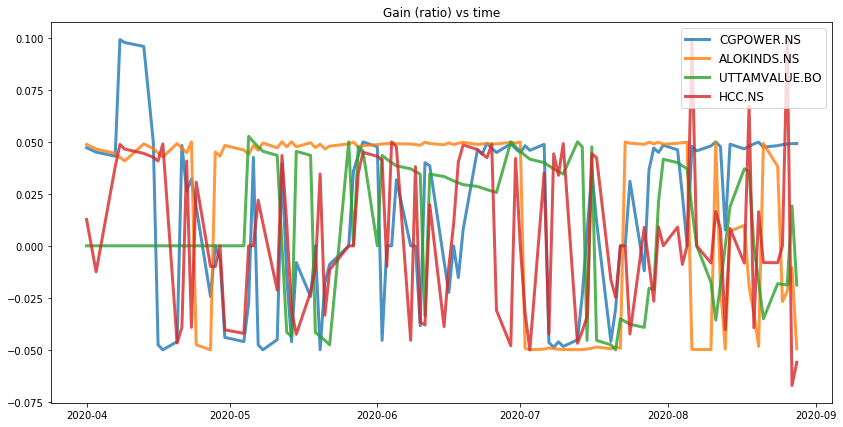

In [85]:
# ind=[i[1] for i in df2.columns.to_list()]
stonks=daf.loc[:,df3.columns.to_list()[3:]]
stonks.head()
plt.figure(figsize=(14, 7))
for c in stonks.index:
    plt.plot(stonks.columns, stonks.loc[c,:], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.title("Gain (ratio) vs time")

In [98]:
Paf=pd.DataFrame(zip(P_return,P_risk,P_sharpie),columns=["return","risk","sharpie"])
# Paf.sort_values(by=["sharpie","return"],axis=0)

rp=Paf[Paf["sharpie"]==max(Paf["sharpie"])]["return"]
sdp=Paf[Paf["sharpie"]==max(Paf["sharpie"])]["risk"]

mrp=Paf[Paf["risk"]==min(Paf["risk"])]['return']
msdp=Paf[Paf["risk"]==min(Paf["risk"])]['risk']


Text(0.5, 1.0, 'Efficient Frontier')

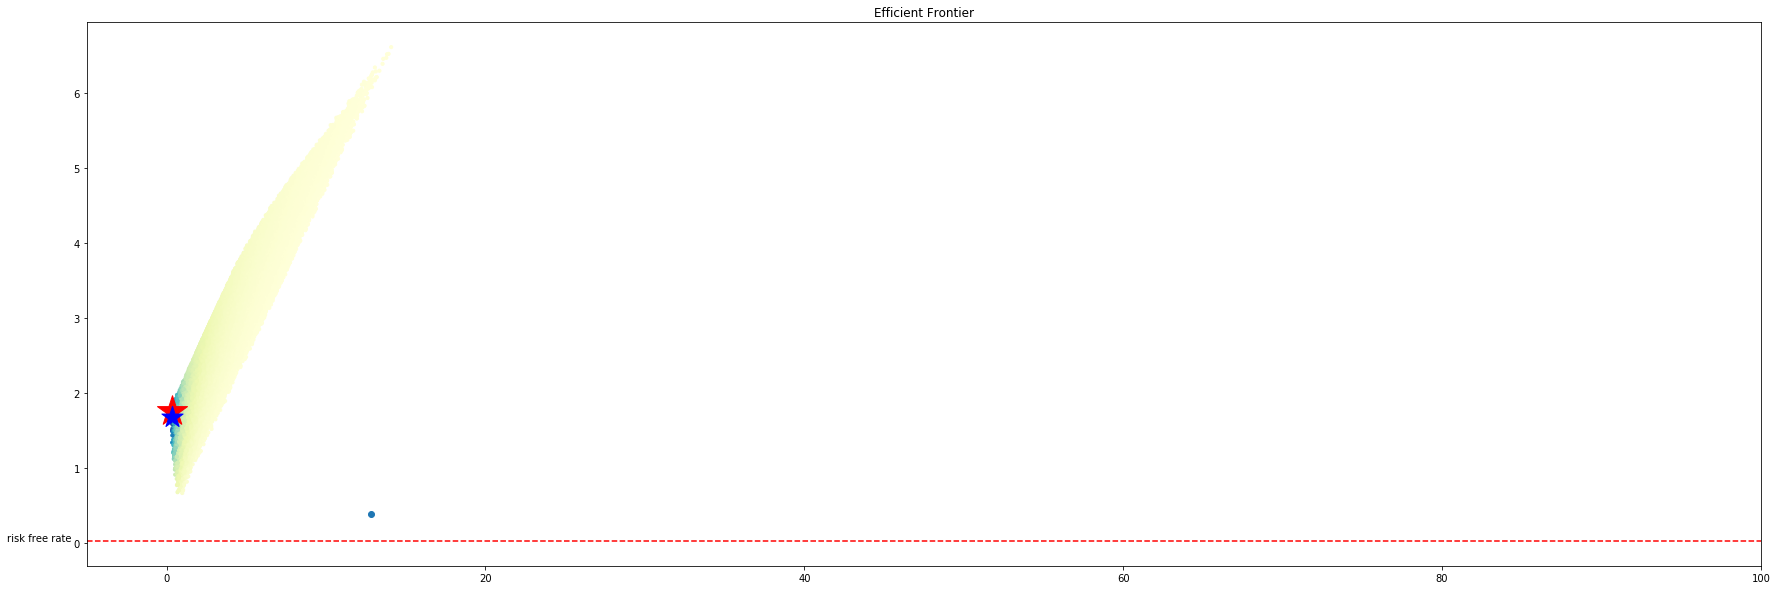

In [100]:
#Max sharpie Ratio
fig,ax=plt.subplots()
fig.set_size_inches(30, 10)
ax.set_xlim(-5,100)
# ax.scatter(df3["Risk"],df3["quaterly_gain"]-1)
ax.scatter(Paf["risk"],Paf["return"]-1,c=Paf["sharpie"],cmap='YlGnBu', marker='o', s=10, alpha=1)
ax.scatter(sdp,rp-1,marker='*',color='r',s=1000, label='Maximum Sharpe ratio')
plt.scatter(msdp,mrp-1,marker='*',color='b',s=500, label='Minimum risk')
ax.scatter(916.88*0.014,0.3798,label="Nifty")
ax.axhline(y=0.0233, color='r', linestyle='--')
ax.text(-10,0.0233,"risk free rate")
plt.title("Efficient Frontier")

In [102]:
print(msdp)    #slighlt different portfolios
print(sdp)

64348    0.306106
Name: risk, dtype: float64
148099    0.306995
Name: risk, dtype: float64


In [93]:
#Efficient Frontier
Paf["risk1"]=Paf["risk"].apply(lambda x: round(x,1))
hr=[]
hg=[]
for i in Paf['risk1'].value_counts().index:
    hr+=[i]
    hg+=[Paf[Paf["risk1"]==i]["return"].max()-1]

Text(0.5, 1.0, 'Efficient Frontier')

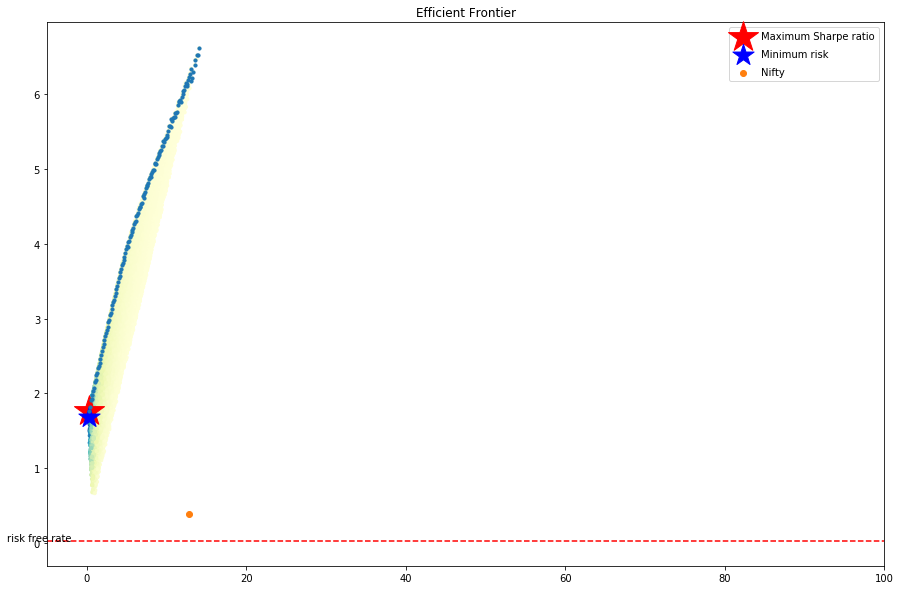

In [103]:
#Max sharpie Ratio
fig,ax=plt.subplots()
fig.set_size_inches(15, 10)
ax.set_xlim(-5,100)
# ax.scatter(df3["Risk"],df3["quaterly_gain"]-1)
ax.scatter(Paf["risk"],Paf["return"]-1,c=Paf["sharpie"],cmap='YlGnBu', marker='o', s=10, alpha=1)
ax.scatter(sdp,rp-1,marker='*',color='r',s=1000, label='Maximum Sharpe ratio')
plt.scatter(msdp,mrp-1,marker='*',color='b',s=500, label='Minimum risk')
ax.scatter(hr,hg,s=10)
ax.scatter(916.88*0.014,0.3798,label="Nifty")
ax.axhline(y=0.0233, color='r', linestyle='--')
ax.text(-10,0.0233,"risk free rate")
plt.legend(labelspacing=0.8)
plt.title("Efficient Frontier") #blue dotted line